In [63]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os 
from os.path import join as pjoin
import glob
import numpy as np
import cv2
# from PIL import Image
from matplotlib import pyplot as plt
import matplotlib as mpl
import sys

mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['image.cmap'] = 'inferno'

def gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def imread(imgpath):
    return cv2.cvtColor(cv2.imread(imgpath), cv2.COLOR_BGR2RGB)

def imshow(img, cmap=None):
    plt.title(img.shape)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
#     plt.show()

def resize(img, shape):
    return cv2.resize(img, (imgshape[1], imgshape[0]))

def match_brute_force(descr_arr0, descr_arr1):
    bf = cv2.BFMatcher()
    # return 2 matches for keypoint
    matches = bf.knnMatch(descr_arr0, descr_arr1, k=2)

    matches_arr = []
    for match_a, match_b in matches:
        # mark match good if 2nd match has bigger distance
        # (filtering similar keypoints)
        if match_a.distance < 0.75 * match_b.distance:
            matches_arr.append((
                match_a.queryIdx,
                match_a.trainIdx
            ))

    return matches_arr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
img_in_path = './tracking/'

## Gaussian blur

### Custom implementation

In [65]:
from det_and_descr import *

test_name = 'translation_' #'translation_', 'translation_noise_', 'rotation_2_', 'rotation_5_'
frame_idx = 8 # 0..8

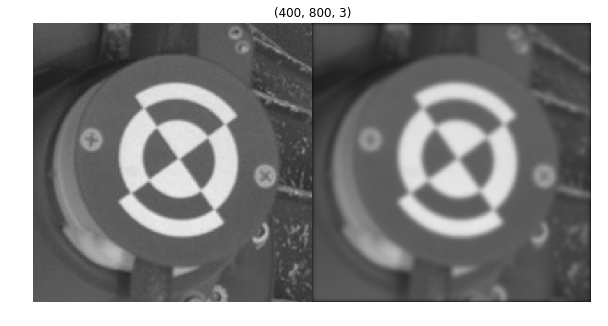

In [66]:
img0_fpath = img_in_path + test_name + str(frame_idx) + '.png'
img0 = cv2.imread(img0_fpath, cv2.IMREAD_GRAYSCALE)

rows = img0.shape[0]
cols = img0.shape[1]

img_blur = gaussian_blur(img0, (31, 31), 3.0)
img_both = np.zeros((rows, cols*2), np.uint8)
img_both[:, 0:cols] = img0
img_both[:, cols:cols*2] = img_blur
img_both_bgr = cv2.cvtColor(img_both, cv2.COLOR_GRAY2BGR)
imshow(img_both_bgr)

### Compare with opencv implementation

In [67]:
from opencv_det_and_descr import detect_keypoints_and_calculate_descriptors

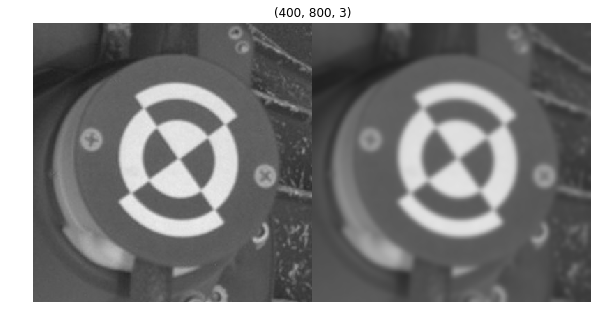

In [68]:
img0_fpath = img_in_path + test_name + str(frame_idx) + '.png'
img0 = cv2.imread(img0_fpath, cv2.IMREAD_GRAYSCALE)
img_blur = cv2.GaussianBlur(img0, (31, 31), 3.0)
img_both = np.zeros((rows, cols*2), np.uint8)
img_both[:, 0:cols] = img0
img_both[:, cols:cols*2] = img_blur
img_both_bgr = cv2.cvtColor(img_both, cv2.COLOR_GRAY2BGR)
imshow(img_both_bgr)

## Detector "Fast"

### Custom implementation

In [69]:
from det_and_descr import *
test_name = 'translation_' #'translation_', 'translation_noise_', 'rotation_2_', 'rotation_5_'
frame_idx = 8 # 0..8

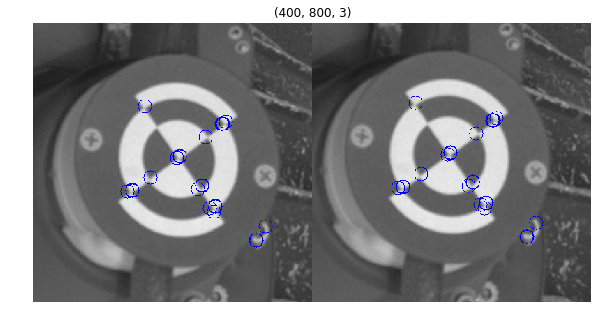

In [70]:
img0_fpath = img_in_path + test_name + str(frame_idx) + '.png'
img0 = cv2.imread(img0_fpath, cv2.IMREAD_GRAYSCALE)

img1_fpath = img_in_path + test_name + str(frame_idx+1) + '.png'
img1 = cv2.imread(img1_fpath, cv2.IMREAD_GRAYSCALE)

rows = img0.shape[0]
cols = img0.shape[1]

# detect keypoints and calculate descriptors
kp0 = find_keypoints_candidates(gaussian_blur(img0.copy(), (31,31), 3.0))
kp1 = find_keypoints_candidates(gaussian_blur(img1.copy(), (31,31), 3.0))

# draw on one image
img_both = np.zeros((rows, cols*2), np.uint8)
img_both[:, 0:cols] = img0
img_both[:, cols:cols*2] = img1
img_both_bgr = cv2.cvtColor(img_both, cv2.COLOR_GRAY2BGR)

 # keypoints as red circles
for i in range(len(kp0)):
    kp = kp0[i]
    x = kp[0]
    y = kp[1]
    cv2.circle(img_both_bgr, (x, y), 10, (0, 0, 255))

for i in range(len(kp1)):
    kp = kp1[i]
    x = kp[0] + cols
    y = kp[1]
    cv2.circle(img_both_bgr, (x, y), 10, (0, 0, 255))
    
imshow(img_both_bgr)

### Compare with opencv implementation

In [71]:
from opencv_det_and_descr import detect_keypoints_and_calculate_descriptors

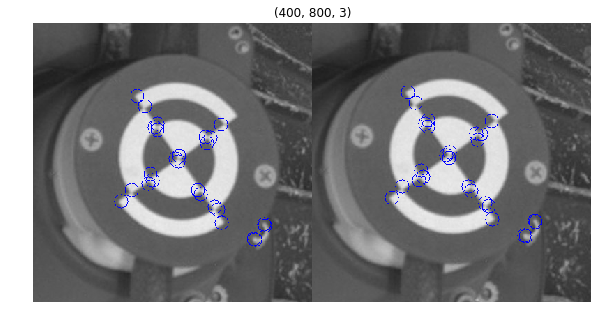

In [72]:
img0_fpath = img_in_path + test_name + str(frame_idx) + '.png'
img0 = cv2.imread(img0_fpath, cv2.IMREAD_GRAYSCALE)

img1_fpath = img_in_path + test_name + str(frame_idx+1) + '.png'
img1 = cv2.imread(img1_fpath, cv2.IMREAD_GRAYSCALE)

rows = img0.shape[0]
cols = img0.shape[1]

# detect keypoints and calculate descriptors
kp0, descr0 = detect_keypoints_and_calculate_descriptors(img0.copy())
kp1, descr1 = detect_keypoints_and_calculate_descriptors(img1.copy())

# draw on one image
img_both = np.zeros((rows, cols*2), np.uint8)
img_both[:, 0:cols] = img0
img_both[:, cols:cols*2] = img1
img_both_bgr = cv2.cvtColor(img_both, cv2.COLOR_GRAY2BGR)

 # keypoints as red circles
for i in range(len(kp0)):
    kp = kp0[i]
    x = kp[0]
    y = kp[1]
    cv2.circle(img_both_bgr, (x, y), 10, (0, 0, 255))

for i in range(len(kp1)):
    kp = kp1[i]
    x = kp[0] + cols
    y = kp[1]
    cv2.circle(img_both_bgr, (x, y), 10, (0, 0, 255))

imshow(img_both_bgr)

## Descriptor "BRIEF"

### Custom implementation

In [73]:
from det_and_descr import *
test_name = 'translation_' #'translation_', 'translation_noise_', 'rotation_2_', 'rotation_5_'
frame_idx = 8 # 0..8

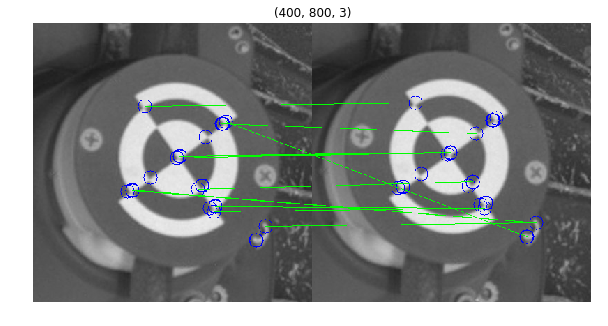

In [74]:
# read two frames
img0_fpath = img_in_path + test_name + str(frame_idx) + '.png'
img0 = cv2.imread(img0_fpath, cv2.IMREAD_GRAYSCALE)

img1_fpath = img_in_path + test_name + str(frame_idx+1) + '.png'
img1 = cv2.imread(img1_fpath, cv2.IMREAD_GRAYSCALE)

rows = img0.shape[0]
cols = img0.shape[1]

# detect keypoints and calculate descriptors
kp0, descr0 = detect_keypoints_and_calculate_descriptors(img0.copy())
kp1, descr1 = detect_keypoints_and_calculate_descriptors(img1.copy())

# match
match_arr = match_hamming(descr0, descr1)

# draw on one image
img_both = np.zeros((rows, cols*2), np.uint8)
img_both[:, 0:cols] = img0
img_both[:, cols:cols*2] = img1
img_both_bgr = cv2.cvtColor(img_both, cv2.COLOR_GRAY2BGR)

# keypoints as red circles
for i in range(len(kp0)):
    kp = kp0[i]
    x = kp[0]
    y = kp[1]
    cv2.circle(img_both_bgr, (x, y), 10, (0, 0, 255))

for i in range(len(kp1)):
    kp = kp1[i]
    x = kp[0] + cols
    y = kp[1]
    cv2.circle(img_both_bgr, (x, y), 10, (0, 0, 255))

# matches as green lines
for pair in match_arr:
    x0 = kp0[pair[0]][0]
    y0 = kp0[pair[0]][1]
    x1 = kp1[pair[1]][0] + cols
    y1 = kp1[pair[1]][1]
    cv2.line(img_both_bgr, (x0, y0), (x1, y1), (0, 255, 0))

imshow(img_both_bgr)


### With help of opencv

In [75]:
from opencv_det_and_descr import detect_keypoints_and_calculate_descriptors

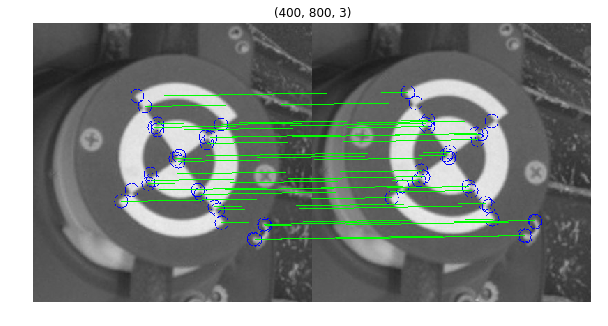

In [76]:
# read two frames
img0_fpath = img_in_path + test_name + str(frame_idx) + '.png'
img0 = cv2.imread(img0_fpath, cv2.IMREAD_GRAYSCALE)

img1_fpath = img_in_path + test_name + str(frame_idx+1) + '.png'
img1 = cv2.imread(img1_fpath, cv2.IMREAD_GRAYSCALE)

rows = img0.shape[0]
cols = img0.shape[1]

# detect keypoints and calculate descriptors
kp0, descr0 = detect_keypoints_and_calculate_descriptors(img0.copy())
kp1, descr1 = detect_keypoints_and_calculate_descriptors(img1.copy())

# match
match_arr = match_brute_force(descr0, descr1)

# draw on one image
img_both = np.zeros((rows, cols*2), np.uint8)
img_both[:, 0:cols] = img0
img_both[:, cols:cols*2] = img1
img_both_bgr = cv2.cvtColor(img_both, cv2.COLOR_GRAY2BGR)

# keypoints as red circles
for i in range(len(kp0)):
    kp = kp0[i]
    x = kp[0]
    y = kp[1]
    cv2.circle(img_both_bgr, (x, y), 10, (0, 0, 255))

for i in range(len(kp1)):
    kp = kp1[i]
    x = kp[0] + cols
    y = kp[1]
    cv2.circle(img_both_bgr, (x, y), 10, (0, 0, 255))

# matches as green lines
for pair in match_arr:
    x0 = kp0[pair[0]][0]
    y0 = kp0[pair[0]][1]
    x1 = kp1[pair[1]][0] + cols
    y1 = kp1[pair[1]][1]
    cv2.line(img_both_bgr, (x0, y0), (x1, y1), (0, 255, 0))

imshow(img_both_bgr)